#Tasks

Currently empty


# Implementation

화이팅

## Installing and Importing dependencies

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

print('installing musescore...')
!sudo apt-get install musescore

#converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

print("Done")

installing lilypond...
installing musescore...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
musescore is already the newest version (2.1.0+dfsg3-3build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
installing fluidsynth...
Done


In [ ]:
pip install music21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries
from music21 import *
import csv
import copy
import pandas as pd
from IPython.display import Image, Audio

## Code

In [146]:
def set_events_per_channel(channel, channel_number):
  events = []

  for i in range(len(channel)):
    if type(channel[i]) == note.Note:
      event = ['Note', channel[i].nameWithOctave, channel[i].quarterLength, channel[i].offset, channel[i].volume.velocity, channel_number]
      events.append(event)

    if type(channel[i]) == chord.Chord:
      event = ['Chord', [x.nameWithOctave for x in channel[i]], channel[i].quarterLength, channel[i].offset, channel[i].volume.velocity, channel_number]
      events.append(event)

    if type(channel[i]) == note.Rest:
      event = ['Rest', '#', channel[i].quarterLength, channel[i].offset, 'none', channel_number]
      events.append(event)
  
  return events

def get_midi_info(piece):
  events_1 = []
  events_2 = []

  channel_1 = [x for x in piece.parts[0].flat.stripTies()]
  channel_2 = [x for x in piece.parts[1].flat.stripTies()]

  events_1 = set_events_per_channel(channel_1, 0)
  events_2 = set_events_per_channel(channel_2, 1)

  return events_1, events_2

# =============================================================================

def channel_insertion(events, id_string):

  new_channel = stream.Part(id = id_string)

  for i in range(len(events)):
    if events[i][0] == 'Note':
      valor_ = note.Note(events[i][1])
      valor_.quarterLength = events[i][2]
      new_channel.append(valor_)

    if events[i][0] == 'Chord':
      valor_ = chord.Chord(events[i][1])
      valor_.quarterLength = events[i][2]
      new_channel.append(valor_)

    if events[i][0] == 'Rest':
      valor_ = note.Rest()
      valor_.quarterLength = events[i][2]
      new_channel.append(valor_)
      
  return new_channel

def write_new_score(score_name, events_1, events_2):
  score = stream.Score(id=score_name)

  new_channel_1 = channel_insertion(events_1, 'part0')
  new_channel_2 = channel_insertion(events_2, 'part1')

  score.insert(0, new_channel_1)
  score.insert(0, new_channel_2)

  score.write('musicxml', '/content/gdrive/MyDrive/TCC - Aline Rezende/midi/score outputs/newscore.mxl')
  score.write('midi', '/content/gdrive/MyDrive/TCC - Aline Rezende/midi/score outputs/newscore.mid')

  return score

# =============================================================================

def create_csv(strings_csv):
  # open the file in the write mode
  f = open('/content/gdrive/MyDrive/TCC - Aline Rezende/midi/Cmaj1.csv', 'w')

  # create the csv writer
  writer = csv.writer(f)

  # write a row to the csv file
  for i in range(len(strings_csv)):
    writer.writerow(strings_csv[i])

  # close the file
  f.close()

# =============================================================================

def show(music):
  display(Image(str(music.write('lily.png'))))

def play(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename.wav -r 44100 > /dev/null
  display(Audio(filename + '.wav'))

def print_cool_info(score, name):
  print('Cool info about the', name, ':')
  show(score)
  #print()
  #play(score)
  print()
  score.plot('histogram', 'pitch')
  print()

# =============================================================================

def main():
  path = "/content/gdrive/MyDrive/TCC - Aline Rezende/midi/Cmaj.mid"

  piece = converter.parse(path)
  #print_cool_info(piece, 'Original Score')
  events_1, events_2 = get_midi_info(piece)

  strings_csv = []
  strings_csv = copy.copy(events_1)
  strings_csv.extend(events_2)

  create_csv(strings_csv)

  new_score = write_new_score("NewScore", events_1, events_2)

  print_cool_info(new_score, 'New Score')

Cool info about the New Score :


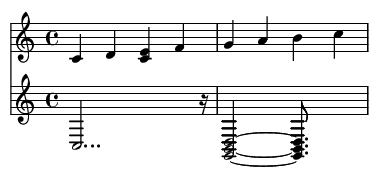

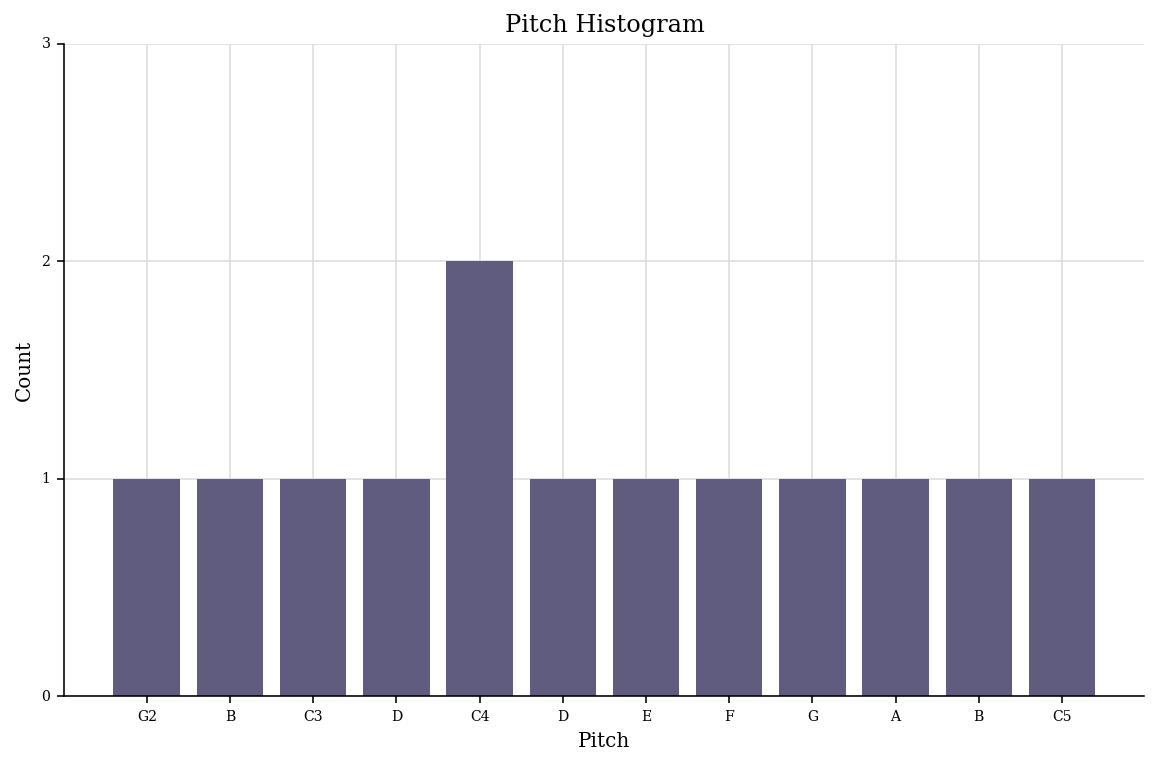

In [147]:
main()

musescore could be a problem, as it wasn't able to represent a whole tone as having duration 4